In [161]:
import numpy as np
from numpy import transpose as tr
from numpy.linalg import norm

In [227]:
def FwdSub(L: np.array ,b: np.array):
    n = len(b)
    result = [0]*n
    for i in range(n):
        s = 0
        for j in range(i):
            s += L[i][j] * result[j] 
        result[i] = (b[i] - s) / L[i][i]
    return result

In [235]:
def generalIterative(A, b, x0, M, N, maxIter, e=0, compareResidual=True):
    x = [x0]*maxIter
    for k in range(1, maxIter):
        # M lower diagnoal matrix
        # M_inv @ (b - A @ x[k-1]) = y <=> M @ y = (b - A @ x[k-1])
        x[k] = x[k-1] + FwdSub(M, (b - A @ x[k-1]))
        if not compareResidual and norm(A @ x[k] - b) / norm(b) < e:
            return x[:k]
        if compareResidual and norm(x[k] - x[k-1]) / norm(x[k]) < e:
            return x[:k]
    
    return x

In [253]:
def Jacoby(A, b, x0, maxIter, w=1, e=0, compareResidual=True):
    D = np.diag(np.diag(A))
    R = A - D
    # for w * D_inv:
    weighted_D = (1/w) * D
    
    return generalIterative(A, b, x0, weighted_D, R, maxIter, e, compareResidual)
    

In [237]:
def GaussSeidel(A, b, x0, maxIter, e=0, compareResidual=True):
    D = np.tril(A)
    U = np.triu(A,-1)

    return generalIterative(A, b, x0, D, U, maxIter, e, compareResidual)

In [238]:
def SD(A, b, x0, maxIter, e=0, compareResidual=True):
    x = [x0]*maxIter
    r = [0]*maxIter
    r[0] = b - A @ x[0]
    
    for k in range(1, maxIter):
        a = (tr(r[k-1]) @ r[k-1]) / (tr(r[k-1]) @ (A @ r[k-1]))
        x[k] = x[k-1] + a*r[k-1]
        r[k] = b - A @ x[k]
        
        if not compareResidual and norm(A @ x[k] - b) / norm(b) < e:
            return x[k], x[:k]
        if compareResidual and norm(x[k] - x[k-1]) / norm(x[k]) < e:
            return x[k], x[:k]
    
    return x

In [294]:
def CG(A, b, x0, maxIter, e=0, compareResidual=True):
    x = [x0]*maxIter
    r = [0]*maxIter
    p = [0]*maxIter
    
    p[0] = r[0] = b - A @ x[0]
    
    for k in range(1, maxIter):
        a = (tr(r[k-1]) @ p[k-1]) / (tr(p[k-1]) @ (A @ p[k-1]))
        x[k] = x[k-1] + a*p[k-1]
        r[k] = b - A @ x[k]
        
        if not compareResidual and norm(A @ x[k] - b) / norm(b) < e:
            return x[k], x[:k]
        if compareResidual and norm(x[k] - x[k-1]) / norm(x[k]) < e:
            return x[k], x[:k]
        
        beta = (tr(r[k]) @ r[k]) / (tr(r[k-1]) @ r[k-1])
        p[k] = r[k] + beta * p[k-1]
    
    return x

In [293]:
from scipy.sparse import random
from scipy.linalg import solve_triangular
import scipy.sparse as sparse
from matplotlib.pyplot import semilogy, plot, show
n = 256
A = random(n, n, 5 / n, dtype=float)
v = np.random.rand(n)
v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')

A = A.transpose() * v * A + 0.1*sparse.eye(n)
b = np.random.randn(n)
x0 = np.array([0]*n)

Jacoby Convergence Graph (w=1)


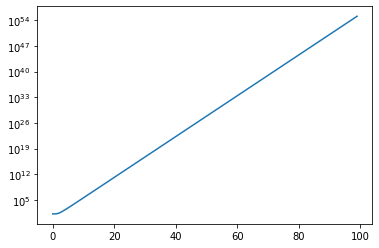

Jacoby Convergence Factor (w=1)


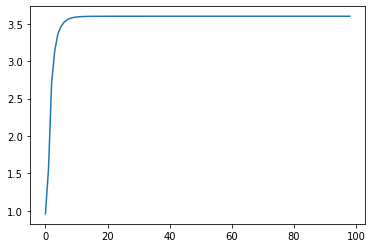

Jacoby Convergence Graph (w=0.2)


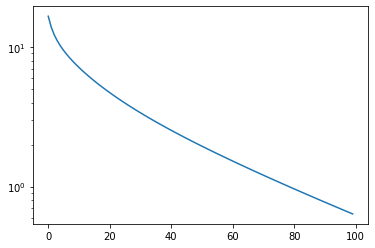

Jacoby Convergence Factor (w=0.2)


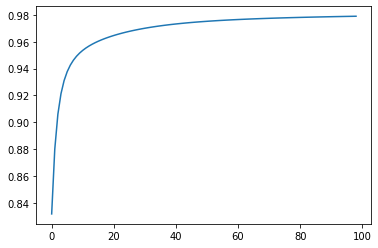

In [302]:
j_1 = Jacoby(A.toarray(), b, x0, 100, w=1)
convergence_graph = [norm(A @ x_k - b) for x_k in j_1]
convergence_factor = [convergence_graph[i] / convergence_graph[i-1] for i in range(1, len(convergence_graph))]
print("Jacoby Convergence Graph (w=1)")
semilogy(convergence_graph)
show()
plot(convergence_factor)
print("Jacoby Convergence Factor (w=1)")
show()

j_02 = Jacoby(A.toarray(), b, x0, 100, w=0.2)
convergence_graph = [norm(A @ x_k - b) for x_k in j_02]
convergence_factor = [convergence_graph[i] / convergence_graph[i-1] for i in range(1, len(convergence_graph))]
print("Jacoby Convergence Graph (w=0.2)")
semilogy(convergence_graph)
show()
plot(convergence_factor)
print("Jacoby Convergence Factor (w=0.2)")
show()

Gauss Seidel Convergence Graph


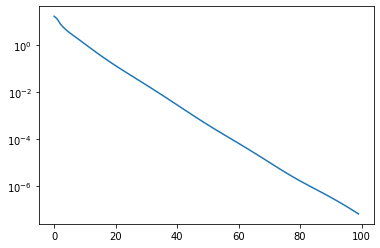

Gauss Seidel Convergence Factor


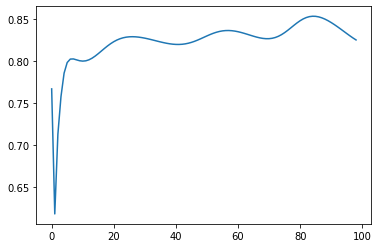

In [303]:
gs = GaussSeidel(A.toarray(), b, x0, 100)
convergence_graph = [norm(A @ x_k - b) for x_k in gs]
convergence_factor = [convergence_graph[i] / convergence_graph[i-1] for i in range(1, len(convergence_graph))]
print("Gauss Seidel Convergence Graph")
semilogy(convergence_graph)
show()
print("Gauss Seidel Convergence Factor")
plot(convergence_factor)
show()

Steepest Descent Convergence Graph


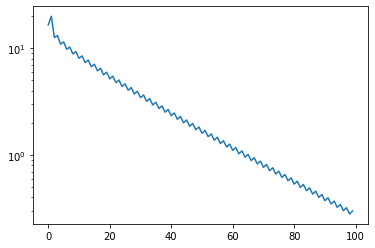

Steepest Descent Convergence Factor


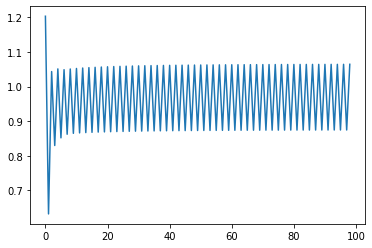

In [304]:
sd = SD(A.toarray(), b, x0, 100)
convergence_graph = [norm(A @ x_k - b) for x_k in sd]
convergence_factor = [convergence_graph[i] / convergence_graph[i-1] for i in range(1, len(convergence_graph))]
print("Steepest Descent Convergence Graph")
semilogy(convergence_graph)
show()
print("Steepest Descent Convergence Factor")
plot(convergence_factor)
show()

Conjugate Descent Convergence Graph


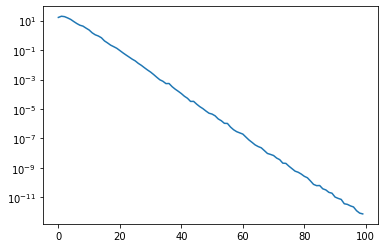

Conjugate Descent Convergence Factor


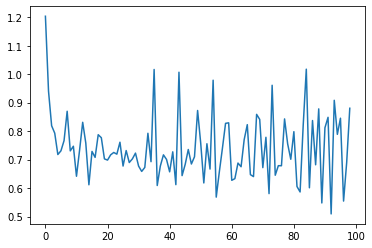

In [305]:
cg1 = CG(A.toarray(), b, x0, 100)
convergence_graph = [norm(A @ x_k - b) for x_k in cg1]
convergence_factor = [convergence_graph[i] / convergence_graph[i-1] for i in range(1, len(convergence_graph))]
print("Conjugate Descent Convergence Graph")
semilogy(convergence_graph)
show()
print("Conjugate Descent Convergence Factor")
plot(convergence_factor)
show()